<a href="https://colab.research.google.com/github/oyhr100/LAB-5-raterx/blob/main/%E2%80%9CLab5_0408_21%3A43.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook Settings**

In [1]:
%matplotlib inline
# Use %matplotlib ipympl or %matplotlib widget if you want interactive matplotlib plots
#%matplotlib widget

# Shuts off Jedi to speed up tab completions
# the command %config Completer.use_jedi = False is used in IPython or Jupyter environments to disable the use of the Jedi library for autocompletion, which can sometimes lead to faster completion suggestions.
%config Completer.use_jedi = False

# reloads modules automatically before entering the execution of code typed at the IPython prompt
%load_ext autoreload
%autoreload 2

In [2]:
import multiprocessing
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import scipy.stats as ss
import seaborn as sns

## Import various ML classes from Scikit-learn
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
import statsmodels.api as sm

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, PrecisionRecallDisplay, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict, StratifiedShuffleSplit, train_test_split

import string
from time import time

In [3]:
#mport ast refers to importing the ast module, which is a part of Python's standard library. The ast module provides facilities for processing, analyzing, and modifying Abstract Syntax Trees (ASTs).
import ast
import datetime
from functools import reduce
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import plotly.express as px
import seaborn as sns
import scipy.stats as ss
#The primary use of the tqdm function is to wrap around any iterable, like a list or a loop, to display a smart progress meter.
#For example, if you have a for loop that iterates over a large dataset, you can wrap tqdm around the iterable, and it will display a progress bar that updates with each iteration.
from tqdm import tqdm

!pip install itables
# To display dataframes as interactive tables in the notebook:
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

import os

In [4]:
import ast
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import seaborn as sns
import scipy.stats as ss

In [5]:
import os
# https://drive.google.com/file/d/19LbtW4l9fNhGZ-6NxINfD7NjEuSK6YH2/view?usp=sharing


if not os.path.exists("20-raterx-data.pq"):
    !gdown --id 19LbtW4l9fNhGZ-6NxINfD7NjEuSK6YH2

In [6]:
plt.rcParams.update({'font.size': 16})
DFILE = '20-raterx-data.pq'
SEED = 24
TOL = 1.0e-8

# **Problem 1**

In [7]:
import pyarrow.parquet as pq

DFILE = '20-raterx-data.pq'
df = pq.read_table(DFILE).to_pandas()
df

gvkey   datadate             conm    sich credit_rating     che  \
0        1004 1990-05-31         AAR CORP  5080.0           BBB   4.044   
1        1004 1991-05-31         AAR CORP  5080.0           BBB   1.553   
2        1004 1992-05-31         AAR CORP  5080.0           BBB   4.197   
3        1004 1993-05-31         AAR CORP  5080.0           BBB   2.255   
4        1004 1994-05-31         AAR CORP  5080.0           BBB  18.074   
...       ...        ...              ...     ...           ...     ...   
26924  266163 2008-12-31  DUNE ENERGY INC  1311.0            B-  15.492   
26925  266163 2009-12-31  DUNE ENERGY INC  1311.0          CCC-  15.053   
26926  266163 2010-12-31  DUNE ENERGY INC  1311.0          CCC-  39.423   
26927  311524 2012-12-31     TAMINCO CORP  2860.0            B+  67.000   
26928  311524 2013-12-31     TAMINCO CORP  2860.0            B+  88.000   

           act    ppent        at     dlc  ...      sale     cogs     xsga  \
0      275.576   63.441   388.521  33.821  ...   444.875  336.931   53.912   
1      268.399   63.415   379.958  16.500  ...   466.542  366.040   58.545   
2      289.537   60.422   395.351  25.005  ...   422.657  331.056   56.910   
3      265.036   56.052   365.151  25.025  ...   382.780  307.436   52.093   
4      307.723   54.783   417.626   0.568  ...   407.754  328.562   50.086   
...        ...      ...       ...     ...  ...       ...      ...      ...   
26924   40.895  357.284   402.052   2.014  ...   146.600  169.196   18.586   
26925   32.805  334.328   372.587   1.579  ...    64.873   34.757   14.321   
26926   51.829  232.721   297.386   1.395  ...    64.189   60.175   11.157   
26927  297.000  434.000  1847.000   6.000  ...  1116.000  823.200  128.000   
26928  311.000  470.000  1856.000   7.000  ...  1200.000  871.200   79.000   

       xrent    oibdp    oiadp    xint  intc       ib      dvp  
0       4.25   54.032   46.851   9.989   0.0   25.655    0.000  
1       4.31   41.957   33.701  10.073   0.0   14.801    0.000  
2       4.85   34.691   26.530   8.356   0.0   10.020    0.000  
3       5.32   23.251   16.343   8.107   0.0    0.283    0.000  
4       4.84   29.106   21.824   9.564   0.0    9.484    0.000  
...      ...      ...      ...     ...   ...      ...      ...  
26924   0.90  -41.182  -98.786  35.022   0.0 -108.728  100.597  
26925   0.80   15.795  -21.202  35.193   0.0  -59.131   36.728  
26926   0.80   -7.143  -36.020  37.424   0.0  -72.057   26.419  
26927  16.60  164.800   67.000  78.200   0.2  -82.000    0.000  
26928  17.10  249.800  135.000  84.500   0.5   -7.000    0.000  

[26929 rows x 27 columns]

In [8]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 26929 rows and 27 columns.


In [9]:
print(df.columns)
print(df.dtypes)

Index(['gvkey', 'datadate', 'conm', 'sich', 'credit_rating', 'che', 'act',
       'ppent', 'at', 'dlc', 'lct', 'dltt', 'lt', 'txdb', 're', 'seq', 'mib',
       'sale', 'cogs', 'xsga', 'xrent', 'oibdp', 'oiadp', 'xint', 'intc', 'ib',
       'dvp'],
      dtype='object')
gvkey                     int64
datadate         datetime64[us]
conm                     object
sich                    float64
credit_rating          category
che                     float64
act                     float64
ppent                   float64
at                      float64
dlc                     float64
lct                     float64
dltt                    float64
lt                      float64
txdb                    float64
re                      float64
seq                     float64
mib                     float64
sale                    float64
cogs                    float64
xsga                    float64
xrent                   float64
oibdp                   float64
oiadp                   fl

In [10]:
print(df.isnull().sum())

gvkey               0
datadate            0
conm                0
sich                0
credit_rating       0
che                50
act              1359
ppent              98
at                 37
dlc                82
lct              1237
dltt               49
lt                 45
txdb             1898
re                771
seq                36
mib              3909
sale               49
cogs               49
xsga             2262
xrent            1871
oibdp              98
oiadp              50
xint              299
intc             2033
ib                 49
dvp                50
dtype: int64


In [11]:
duplicates = df.duplicated()
print(f"There are {duplicates.sum()} duplicated rows.")

There are 0 duplicated rows.


In [12]:
print(df.describe())

               gvkey                    datadate          sich            che  \
count   26929.000000                       26929  26929.000000   26879.000000   
mean    39780.657210  2003-11-14 04:43:40.758290   4162.580267     720.860158   
min      1004.000000         1990-01-31 00:00:00    100.000000       0.000000   
25%      6386.000000         1997-12-31 00:00:00   2834.000000      20.719000   
50%     12480.000000         2003-10-31 00:00:00   3711.000000      86.504000   
75%     61338.000000         2009-12-31 00:00:00   5172.000000     355.650000   
max    311524.000000         2016-12-31 00:00:00   9997.000000  113240.000000   
std     53590.724638                         NaN   1910.456502    3516.283431   

                 act          ppent             at            dlc  \
count   25570.000000   26831.000000   26892.000000   26847.000000   
mean     2162.046753    2684.529699    8225.283046     511.319648   
min         0.861000       0.000000       0.861000    -882.0000

## Limitations and Issues:

1. Several columns have missing values, necessitating decisions on how to handle missing data through

2. Limited contextual information and potential data quality issues, such as outliers or inconsistencies, may require further research and data validation.


# **Problem 2**
Perform feature engineering on the data to construct a set of predictors for your model.

In [13]:
df = pd.read_parquet(DFILE)

# Function to apply log transformation with custom handling for negative values
def log_transform(x):
    if x > 0:
        return np.log(x)
    else:
        return -1

vlist = [ 'che', 'act',
       'ppent', 'at', 'dlc', 'lct', 'dltt', 'lt', 'txdb', 're', 'seq', 'mib',
       'sale', 'cogs', 'xsga', 'xrent', 'oibdp', 'oiadp', 'xint', 'intc', 'ib',
       'dvp']

for i in vlist:
  df['l_'+i] = df[i].apply(lambda x: np.log(x) if x > 0 else -np.log(-x))

df

gvkey   datadate             conm    sich credit_rating     che  \
0        1004 1990-05-31         AAR CORP  5080.0           BBB   4.044   
1        1004 1991-05-31         AAR CORP  5080.0           BBB   1.553   
2        1004 1992-05-31         AAR CORP  5080.0           BBB   4.197   
3        1004 1993-05-31         AAR CORP  5080.0           BBB   2.255   
4        1004 1994-05-31         AAR CORP  5080.0           BBB  18.074   
...       ...        ...              ...     ...           ...     ...   
26924  266163 2008-12-31  DUNE ENERGY INC  1311.0            B-  15.492   
26925  266163 2009-12-31  DUNE ENERGY INC  1311.0          CCC-  15.053   
26926  266163 2010-12-31  DUNE ENERGY INC  1311.0          CCC-  39.423   
26927  311524 2012-12-31     TAMINCO CORP  2860.0            B+  67.000   
26928  311524 2013-12-31     TAMINCO CORP  2860.0            B+  88.000   

           act    ppent        at     dlc  ...    l_sale    l_cogs    l_xsga  \
0      275.576   63.441   388.521  33.821  ...  6.097793  5.819878  3.987353   
1      268.399   63.415   379.958  16.500  ...  6.145348  5.902743  4.069796   
2      289.537   60.422   395.351  25.005  ...  6.046561  5.802288  4.041471   
3      265.036   56.052   365.151  25.025  ...  5.947460  5.728267  3.953031   
4      307.723   54.783   417.626   0.568  ...  6.010664  5.794726  3.913742   
...        ...      ...       ...     ...  ...       ...       ...       ...   
26924   40.895  357.284   402.052   2.014  ...  4.987708  5.131058  2.922409   
26925   32.805  334.328   372.587   1.579  ...  4.172432  3.548381  2.661727   
26926   51.829  232.721   297.386   1.395  ...  4.161832  4.097257  2.412067   
26927  297.000  434.000  1847.000   6.000  ...  7.017506  6.713199  4.852030   
26928  311.000  470.000  1856.000   7.000  ...  7.090077  6.769872  4.369448   

        l_xrent   l_oibdp   l_oiadp    l_xint    l_intc      l_ib     l_dvp  
0      1.446919  3.989576  3.846972  2.301484       inf  3.244738       inf  
1      1.460938  3.736645  3.517528  2.309859       inf  2.694695       inf  
2      1.578979  3.546480  3.278276  2.122980       inf  2.304583       inf  
3      1.671473  3.146348  2.793800  2.092728       inf -1.262308       inf  
4      1.576915  3.370944  3.083010  2.258006       inf  2.249606       inf  
...         ...       ...       ...       ...       ...       ...       ...  
26924 -0.105361 -3.718001 -4.592956  3.555976       inf -4.688849  4.611122  
26925 -0.223144  2.759693 -3.054096  3.560847       inf -4.079755  3.603539  
26926 -0.223144 -1.966133 -3.584074  3.622312       inf -4.277457  3.274083  
26927  2.809403  5.104733  4.204693  4.359270 -1.609438 -4.406719       inf  
26928  2.839078  5.520661  4.905275  4.436752 -0.693147 -1.945910       inf  

[26929 rows x 49 columns]

 a. What variables do you think will be informative about a firms’ credit ratings? Justify your choices.


In [14]:
# Mapping from credit ratings to numbers
credit_rating_to_number = {
    'AAA': 1,
    'AA+': 1,
    'AA': 1,
    'AA-': 1,
    'A+': 1,
    'A': 1,
    'A-': 1,
    'BBB+': 1,
    'BBB': 1,
    'BBB-': 1,
    'BB+': 0,
    'BB': 0,
    'BB-': 0,
    'B+': 0,
    'B': 0,
    'B-': 0,
    'CCC+': 0,
    'CCC': 0,
    'CCC-': 0,
    'CC': 0,
    'C': 0,
    'D': 0,
}

df['credit_rating_number'] = df['credit_rating'].map(credit_rating_to_number)
df = df.dropna()
df

gvkey   datadate             conm    sich credit_rating     che  \
0        1004 1990-05-31         AAR CORP  5080.0           BBB   4.044   
1        1004 1991-05-31         AAR CORP  5080.0           BBB   1.553   
2        1004 1992-05-31         AAR CORP  5080.0           BBB   4.197   
3        1004 1993-05-31         AAR CORP  5080.0           BBB   2.255   
4        1004 1994-05-31         AAR CORP  5080.0           BBB  18.074   
...       ...        ...              ...     ...           ...     ...   
26924  266163 2008-12-31  DUNE ENERGY INC  1311.0            B-  15.492   
26925  266163 2009-12-31  DUNE ENERGY INC  1311.0          CCC-  15.053   
26926  266163 2010-12-31  DUNE ENERGY INC  1311.0          CCC-  39.423   
26927  311524 2012-12-31     TAMINCO CORP  2860.0            B+  67.000   
26928  311524 2013-12-31     TAMINCO CORP  2860.0            B+  88.000   

           act    ppent        at     dlc  ...    l_cogs    l_xsga   l_xrent  \
0      275.576   63.441   388.521  33.821  ...  5.819878  3.987353  1.446919   
1      268.399   63.415   379.958  16.500  ...  5.902743  4.069796  1.460938   
2      289.537   60.422   395.351  25.005  ...  5.802288  4.041471  1.578979   
3      265.036   56.052   365.151  25.025  ...  5.728267  3.953031  1.671473   
4      307.723   54.783   417.626   0.568  ...  5.794726  3.913742  1.576915   
...        ...      ...       ...     ...  ...       ...       ...       ...   
26924   40.895  357.284   402.052   2.014  ...  5.131058  2.922409 -0.105361   
26925   32.805  334.328   372.587   1.579  ...  3.548381  2.661727 -0.223144   
26926   51.829  232.721   297.386   1.395  ...  4.097257  2.412067 -0.223144   
26927  297.000  434.000  1847.000   6.000  ...  6.713199  4.852030  2.809403   
26928  311.000  470.000  1856.000   7.000  ...  6.769872  4.369448  2.839078   

        l_oibdp   l_oiadp    l_xint    l_intc      l_ib     l_dvp  \
0      3.989576  3.846972  2.301484       inf  3.244738       inf   
1      3.736645  3.517528  2.309859       inf  2.694695       inf   
2      3.546480  3.278276  2.122980       inf  2.304583       inf   
3      3.146348  2.793800  2.092728       inf -1.262308       inf   
4      3.370944  3.083010  2.258006       inf  2.249606       inf   
...         ...       ...       ...       ...       ...       ...   
26924 -3.718001 -4.592956  3.555976       inf -4.688849  4.611122   
26925  2.759693 -3.054096  3.560847       inf -4.079755  3.603539   
26926 -1.966133 -3.584074  3.622312       inf -4.277457  3.274083   
26927  5.104733  4.204693  4.359270 -1.609438 -4.406719       inf   
26928  5.520661  4.905275  4.436752 -0.693147 -1.945910       inf   

       credit_rating_number  
0                         1  
1                         1  
2                         1  
3                         1  
4                         1  
...                     ...  
26924                     0  
26925                     0  
26926                     0  
26927                     0  
26928                     0  

[15986 rows x 50 columns]

In [15]:
df['current_ratio'] = df['act'] / df['lct']
df['interest_coverage'] = df['oibdp'] / df['xint']
df['return_on_equity'] = df['ib'] / df['seq']
df['asset_turnover'] = df['sale'] / df['at']

df['gross_profit_margin'] = (df['sale'] - df['cogs']) / df['sale']
df['operating_margin'] = df['oibdp'] / df['sale']
df['net_profit_margin'] = df['ib'] / df['sale']
df['return_on_asset'] = df['ib'] / df['at']
df['debt_ratio'] = df['lt'] / df['at']

<ipython-input-15-15ec4630452a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['current_ratio'] = df['act'] / df['lct']
<ipython-input-15-15ec4630452a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['interest_coverage'] = df['oibdp'] / df['xint']
<ipython-input-15-15ec4630452a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [16]:
df_new = df

In [17]:
# 将无穷大值替换为NaN
df_new.replace([np.inf, -np.inf], np.nan, inplace=True)

# 移除含有NaN的行
df_new.dropna(inplace=True)
df_new

<ipython-input-17-39c64934e699>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-17-39c64934e699>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.dropna(inplace=True)


gvkey   datadate                    conm    sich credit_rating  \
150      1161 2009-12-31  ADVANCED MICRO DEVICES  3674.0            B-   
352      1318 2005-12-31             ALLTEL CORP  4812.0             A   
353      1318 2006-12-31             ALLTEL CORP  4812.0            A-   
372      1356 1990-12-31               ALCOA INC  3334.0             A   
373      1356 1991-12-31               ALCOA INC  3334.0             A   
...       ...        ...                     ...     ...           ...   
25430  160893 2005-03-31                 ENERSYS  3690.0            BB   
25500  162129 2005-05-31               MOSAIC CO  2870.0            BB   
25501  162129 2006-05-31               MOSAIC CO  2870.0            BB   
25543  162401 2005-12-31           HUNTSMAN CORP  2860.0           BB-   
26265  176899 2007-12-31    SANDRIDGE ENERGY INC  1311.0             B   

            che       act     ppent         at     dlc  ...  \
150    2676.000  4275.000  3809.000   9078.000  479.00  ...   
352     989.200  4365.400  8063.600  24013.100  205.10  ...   
353     934.200  2032.100  5231.400  18343.700   36.30  ...   
372     636.100  3744.000  6747.000  11413.200  192.60  ...   
373     625.800  3615.700  6586.100  11178.400  328.50  ...   
...         ...       ...       ...        ...     ...  ...   
25430    21.341   467.617   279.868   1194.761   14.10  ...   
25500   245.000  1731.900  4121.400   8444.000  204.90  ...   
25501   173.300  1580.400  4416.600   8720.600  222.10  ...   
25543   142.800  3096.000  4643.200   8870.500   44.60  ...   
26265    63.135   226.452  3337.410   3630.566   15.35  ...   

       credit_rating_number  current_ratio  interest_coverage  \
150                       0       1.934389           1.400911   
352                       1       1.815286          10.375782   
353                       1       1.697235           8.825998   
372                       1       1.837366          10.689571   
373                       1       1.746968           9.091074   
...                     ...            ...                ...   
25430                     0       1.638232           5.005231   
25500                     0       1.564075           4.411813   
25501                     0       1.403428           4.693464   
25543                     0       1.640091           3.277396   
26265                     0       0.975640           2.914616   

       return_on_equity  asset_turnover  gross_profit_margin  \
150            0.584877        0.595175             0.616324   
352            0.100528        0.395076             0.574017   
353            0.065050        0.429793             0.553560   
372            0.057173        0.938405             0.279033   
373            0.012699        0.884214             0.234417   
...                 ...             ...                  ...   
25430          0.073993        0.907179             0.272682   
25500          0.052155        0.520689             0.169400   
25501         -0.034383        0.608421             0.198933   
25543          0.024333        1.461203             0.173142   
26265          0.022646        0.186597             0.609990   

       operating_margin  net_profit_margin  return_on_asset  debt_ratio  
150            0.113826           0.070146         0.041749    0.810090  
352            0.384758           0.137926         0.054491    0.457754  
353            0.330919           0.104477         0.044904    0.309425  
372            0.204805           0.027563         0.025865    0.409079  
373            0.152497           0.006344         0.005609    0.436467  
...                 ...                ...              ...         ...  
25430          0.108582           0.029877         0.027104    0.631343  
25500          0.122319           0.038119         0.019848    0.616852  
25501          0.152946          -0.022881        -0.013921    0.592780  
25543          0.110295           0.002855         0.004171    0.826278 

In [18]:
df_new.columns

Index(['gvkey', 'datadate', 'conm', 'sich', 'credit_rating', 'che', 'act',
       'ppent', 'at', 'dlc', 'lct', 'dltt', 'lt', 'txdb', 're', 'seq', 'mib',
       'sale', 'cogs', 'xsga', 'xrent', 'oibdp', 'oiadp', 'xint', 'intc', 'ib',
       'dvp', 'l_che', 'l_act', 'l_ppent', 'l_at', 'l_dlc', 'l_lct', 'l_dltt',
       'l_lt', 'l_txdb', 'l_re', 'l_seq', 'l_mib', 'l_sale', 'l_cogs',
       'l_xsga', 'l_xrent', 'l_oibdp', 'l_oiadp', 'l_xint', 'l_intc', 'l_ib',
       'l_dvp', 'credit_rating_number', 'current_ratio', 'interest_coverage',
       'return_on_equity', 'asset_turnover', 'gross_profit_margin',
       'operating_margin', 'net_profit_margin', 'return_on_asset',
       'debt_ratio'],
      dtype='object')

In [19]:
'''vlist = ['l_che', 'l_act', 'l_ppent', 'l_at', 'l_dlc', 'l_lct', 'l_dltt',
       'l_lt', 'l_txdb', 'l_re', 'l_seq', 'l_mib', 'l_sale', 'l_cogs',
       'l_xsga', 'l_xrent', 'l_oibdp', 'l_oiadp', 'l_xint', 'l_intc', 'l_ib',
       'l_dvp','credit_rating_number']
fig,axes=plt.subplots(15,2,figsize=(20,100))
axes=np.ravel(axes)
for v,ax in zip(vlist,axes):
    sns.regplot(y=df_new['credit_rating_number'],x=df[v],line_kws={'color':'r','linewidth':1},ax=ax)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)'''

"vlist = ['l_che', 'l_act', 'l_ppent', 'l_at', 'l_dlc', 'l_lct', 'l_dltt',\n       'l_lt', 'l_txdb', 'l_re', 'l_seq', 'l_mib', 'l_sale', 'l_cogs',\n       'l_xsga', 'l_xrent', 'l_oibdp', 'l_oiadp', 'l_xint', 'l_intc', 'l_ib',\n       'l_dvp','credit_rating_number']\nfig,axes=plt.subplots(15,2,figsize=(20,100))\naxes=np.ravel(axes)\nfor v,ax in zip(vlist,axes):\n    sns.regplot(y=df_new['credit_rating_number'],x=df[v],line_kws={'color':'r','linewidth':1},ax=ax)\n    ax.spines['right'].set_visible(False)\n    ax.spines['top'].set_visible(False)"

# **Problem 3**

ensure you understand the data and that the data is ready for modeling and inference.

EDA should also provide insights into the modeling process (e.g., what to expectin terms of variable relations, potential problems)

# Train-test split

In [20]:
# train size
train_size = 0.75
df_train = df_new.sample(frac=train_size,replace=False,random_state=SEED) #replace=False ensures that the same row is not selected more than once.
df_train.drop(columns=['gvkey', 'datadate', 'conm', 'sich'], inplace=True)
# test data
# Create a set of indices for the test set.
# set(df.index) creates a set of all indices in the original DataFrame.
# set(df_train.index) creates a set of indices that were selected for the training set.
# Subtracting these two sets (set(df.index) - set(df_train.index)) leaves the indices that were not selected for training, which are the indices for the test set.
test_inds = set(df_new.index) - set(df_train.index)

#df.loc[list(test_inds)] selects the rows from the original DataFrame (df) that correspond to the test indices (test_inds).
# This creates the test DataFrame (df_test), which contains the remaining 25% of the data not used in the training set.
df_test = df.loc[list(test_inds)]

# tests
assert np.abs(int(df.shape[0]*train_size) - df_train.shape[0]) <= 1
assert df.shape[0] == df_train.shape[0] + df_test.shape[0]

In [21]:
df_train

credit_rating        che        act      ppent          at       dlc  \
9269            AAA  25475.000  46849.000  15734.000  115268.000  5825.000   
3884              A   1851.000  12422.000  10309.000   33250.000  1397.000   
1646             A+    161.753   2026.147   1706.824    5284.261   756.831   
11023            A-     75.000   2262.000   2329.000    5635.000   437.000   
389            BBB+    483.000   8086.000  16879.000   38803.000  1627.000   
...             ...        ...        ...        ...         ...       ...   
15101          BBB-     10.000    205.000   3333.000    3624.000    28.000   
11942           BBB    559.000   7332.000  12114.000   23401.000   437.000   
25543           BB-    142.800   3096.000   4643.200    8870.500    44.600   
11974            A+    755.000   9248.000   4262.000   16719.000   340.000   
11186          BBB-    111.000   6283.000   5712.000   16584.000  1696.000   

             lct      dltt         lt      txdb  ...  credit_rating_number  \
9269   21835.000  7314.000  50144.000  7696.000  ...                     1   
3884    7463.000  6783.000  23853.000  1166.000  ...                     1   
1646    1847.026  1339.764   3425.337   202.319  ...                     1   
11023   1982.000  1213.000   3886.000   440.000  ...                     1   
389     7166.000  6371.000  20327.000   545.000  ...                     1   
...          ...       ...        ...       ...  ...                   ...   
15101    324.000  1741.000   2921.000   682.000  ...                     1   
11942   5032.000  4356.000  14547.000  2020.000  ...                     1   
25543   1887.700  4413.300   7329.500   258.300  ...                     0   
11974   7311.000  1275.000  11765.000   133.000  ...                     1   
11186   5680.000  6400.000  14898.000  1186.000  ...                     1   

       current_ratio  interest_coverage  return_on_equity  asset_turnover  \
9269        2.145592          44.940909          0.126334        0.418234   
3884        1.664478           8.462107          0.230493        0.827549   
1646        1.096978           4.864162          0.197439        1.444447   
11023       1.141271           4.055000         -0.083086        1.404259   
389         1.128384           9.052533          0.160527        0.792413   
...              ...                ...               ...             ...   
15101       0.632716           2.687117         -0.137574        0.298013   
11942       1.457075          10.007614          0.060763        1.545062   
25543       1.640091           3.277396          0.024333        1.461203   
11974       1.264943          13.169903          0.237011        1.478139   
11186       1.106162           1.494457         -0.449047        0.792270   

       gross_profit_margin  operating_margin  net_profit_margin  \
9269              0.882387          0.410172           0.170362   
3884              0.332061          0.166376           0.074611   
1646              0.312935          0.121981           0.047636   
11023             0.252496          0.102490          -0.017692   
389               0.211396          0.156921           0.083615   
...                    ...               ...                ...   
15101             0.576852          0.405556          -0.086111   
11942             0.126756          0.109055           0.011367   
25543             0.173142          0.110295           0.002855   
11974             0.275766          0.109780           0.043378   
11186             0.206180          0.102595          -0.051983   

       return_on_asset  debt_ratio  
9269          0.071251    0.435021  
3884          0.061744    0.717383  
1646          0.068807    0.648215  
11023        -0.024845    0.689618  
389           0.066258    0.523851  
...                ...         ...  
15101        -0.025662    0.806015  
11942         0.017563    0.621640  
25543         0.004171    0.826278  
11974         0.064119    0.7036

## Continuous variables (list_cts_vars = ['age','balance','duration','campaign','pdays','previous'])

In [22]:
# Continuous variables -- 6 vars
list_cts_vars = ['che', 'act',
       'ppent', 'at', 'dlc', 'lct', 'dltt', 'lt', 'txdb', 're', 'seq', 'mib',
       'sale', 'cogs', 'xsga', 'xrent', 'oibdp', 'oiadp', 'xint', 'intc', 'ib',
       'dvp', ]

# binary variables -- 1 vars
list_bin = ['credit_rating_number']


tr=df_train[list_cts_vars].mean()
print(tr)
te=df_test[list_cts_vars].mean()
print(te)
t=df[list_cts_vars].mean()
print(t)
pd.concat((t,tr,te),axis=1,keys=['all','train','test']).style.format("{:.2f}")

che        674.436535
act       4239.276091
ppent     7838.799783
at       15774.993084
dlc        797.575654
lct       3552.057231
dltt      3143.262353
lt        9734.169962
txdb      1084.657675
re        4196.912227
seq       5636.172948
mib        381.230168
sale     14290.382762
cogs     10270.858497
xsga      1832.867136
xrent      198.565413
oibdp     2186.657129
oiadp     1345.550591
xint       312.475965
intc        36.583591
ib         699.280080
dvp         22.316059
dtype: float64
che        945.727853
act       4557.482274
ppent     8076.639137
at       16415.406168
dlc        787.486379
lct       3580.145989
dltt      3188.805253
lt        9877.661937
txdb      1110.497989
re        5064.518958
seq       6136.831221
mib        379.691958
sale     15358.460832
cogs     11207.292095
xsga      1837.463053
xrent      208.450632
oibdp     2313.705684
oiadp     1401.636305
xint       317.496589
intc        44.553063
ib         724.494905
dvp         17.558305
dtype: float64
ch

,all,train,test
che,742.08,674.44,945.73
act,4318.62,4239.28,4557.48
ppent,7898.10,7838.80,8076.64
at,15934.68,15774.99,16415.41
dlc,795.06,797.58,787.49
lct,3559.06,3552.06,3580.15
dltt,3154.62,3143.26,3188.81
lt,9769.95,9734.17,9877.66
txdb,1091.10,1084.66,1110.50
re,4413.24,4196.91,5064.52


### Two-sample t-tests between train and test datasets

In [23]:
df_train_mean = df_train[list_cts_vars].mean()
df_train_std = df_train[list_cts_vars].std()
df_train_count = df_train[list_cts_vars].count()

# Combine these into a single DataFrame
tr_stats = pd.concat([df_train_mean, df_train_std, df_train_count],
                     axis=1,
                     keys=['tr_avg', 'tr_sd', 'tr_n'])

#print(tr_stats)
# Calculate the standard error
tr_stats['tr_se'] = tr_stats['tr_sd'] / np.sqrt(tr_stats['tr_n'])

# Drop rows with NA values
tr = tr_stats.dropna()
print(tr)
##you can rewrite the above in fewer lines -- see te and trte

# test sample summary stats               really efficient!!!!!
te = (
    pd
    .concat((df_test[list_cts_vars].mean(), df_test[list_cts_vars].std(), df_test[list_cts_vars].count()), keys=['te_avg','te_sd','te_n'], axis=1)
    .assign(te_se = lambda x: x.te_sd / np.sqrt(x.te_n))
    .dropna()
)
print(te)

## Test average of training dataset vs average of test dataset
trte = (
    pd
    .concat((tr,te),axis=1)
    .assign(tdiff = lambda x: (x.tr_avg - x.te_avg) / np.sqrt(x.tr_se**2 + x.te_se**2))               # here is comparing the means of two subsets
    .loc[:,['tr_avg','te_avg','tdiff']]
)

# Ensure no stat sig diffs
assert (trte.tdiff < 1.65).all()
print(trte)

             tr_avg         tr_sd  tr_n        tr_se
che      674.436535   1759.667031   286   104.051293
act     4239.276091   5347.306948   286   316.192888
ppent   7838.799783  11593.443629   286   685.534693
at     15774.993084  19425.134702   286  1148.632294
dlc      797.575654   1346.555920   286    79.623521
lct     3552.057231   4663.691896   286   275.769883
dltt    3143.262353   2817.880337   286   166.624757
lt      9734.169962  10993.366461   286   650.051386
txdb    1084.657675   2197.903920   286   129.964783
re      4196.912227   9325.015910   286   551.399750
seq     5636.172948   8587.775728   286   507.805824
mib      381.230168    644.272968   286    38.096659
sale   14290.382762  20410.808909   286  1206.916432
cogs   10270.858497  16304.181959   286   964.086490
xsga    1832.867136   2363.645233   286   139.765273
xrent    198.565413    302.836476   286    17.907096
oibdp   2186.657129   2890.030008   286   170.891057
oiadp   1345.550591   1893.936042   286   111.

Summary statistics

In [24]:
df_train.info()
df_train.describe([.01,.5,.99]).T  #it will only print cts and binary vars

<class 'pandas.core.frame.DataFrame'>
Index: 286 entries, 9269 to 11186
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   credit_rating         286 non-null    category
 1   che                   286 non-null    float64 
 2   act                   286 non-null    float64 
 3   ppent                 286 non-null    float64 
 4   at                    286 non-null    float64 
 5   dlc                   286 non-null    float64 
 6   lct                   286 non-null    float64 
 7   dltt                  286 non-null    float64 
 8   lt                    286 non-null    float64 
 9   txdb                  286 non-null    float64 
 10  re                    286 non-null    float64 
 11  seq                   286 non-null    float64 
 12  mib                   286 non-null    float64 
 13  sale                  286 non-null    float64 
 14  cogs                  286 non-null    float64 
 15  xsga  

count          mean           std          min  \
che                   286.0    674.436535   1759.667031     1.000000   
act                   286.0   4239.276091   5347.306948    33.329000   
ppent                 286.0   7838.799783  11593.443629    90.247000   
at                    286.0  15774.993084  19425.134702   262.914000   
dlc                   286.0    797.575654   1346.555920     0.019000   
lct                   286.0   3552.057231   4663.691896    34.331000   
dltt                  286.0   3143.262353   2817.880337    12.185000   
lt                    286.0   9734.169962  10993.366461   195.729000   
txdb                  286.0   1084.657675   2197.903920     0.060000   
re                    286.0   4196.912227   9325.015910 -5785.000000   
seq                   286.0   5636.172948   8587.775728 -2548.300000   
mib                   286.0    381.230168    644.272968     0.344000   
sale                  286.0  14290.382762  20410.808909   175.391000   
cogs                  286.0  10270.858497  16304.181959    83.605000   
xsga                  286.0   1832.867136   2363.645233     5.046000   
xrent                 286.0    198.565413    302.836476     0.319000   
oibdp                 286.0   2186.657129   2890.030008  -411.443000   
oiadp                 286.0   1345.550591   1893.936042 -1280.000000   
xint                  286.0    312.475965    293.142928     4.611000   
intc                  286.0     36.583591     73.502775     0.028000   
ib                    286.0    699.280080   1316.739594 -2431.200000   
dvp                   286.0     22.316059     40.912793    -1.000000   
l_che                 286.0      5.337112      1.625378     0.000000   
l_act                 286.0      7.648603      1.311153     3.506428   
l_ppent               286.0      8.231430      1.296082     4.502550   
l_at                  286.0      9.015098      1.244050     5.571827   
l_dlc                 286.0      5.231511      2.103702    -3.963316   
l_lct                 286.0      7.370250      1.437375     3.536049   
l_dltt                286.0      7.554327      1.151045     2.500206   
l_lt                  286.0      8.553011      1.249983     5.276731   
l_txdb                286.0      5.768023      1.821784    -2.813411   
l_re                  286.0      4.872182      5.579569    -8.663024   
l_seq                 286.0      7.747118      1.737121    -7.843182   
l_mib                 286.0      4.549570      1.985348    -1.067114   
l_sale                286.0      8.773631      1.387658     5.167018   
l_cogs                286.0      8.327089      1.455291     4.426103   
l_xsga                286.0      6.658642      1.529743     1.618596   
l_xrent               286.0      4.386659      1.537514    -1.142564   
l_oibdp               286.0      6.834485      1.776055    -6.019670   
l_oiadp               286.0      5.746820      3.140309    -7.154615   
l_xint                286.0      5.227569      1.137858     1.528445   
l_intc                286.0      2.386268      1.748000    -3.575551   
l_ib                  286.0      3.992808      4.392777    -7.796140   
l_dvp                 286.0      2.058451      1.782772    -4.961845   
credit_rating_number  286.0      0.751748      0.432756     0.000000   
current_ratio         286.0      1.410819      0.528016     0.302166   
interest_coverage     286.0      7.484699      6.294611    -0.912685   
return_on_equity      286.0     -0.295106      7.591601  -128.070878   
asset_turnover        286.0      0.879497      0.401042     0.080073   
gross_profit_margin   286.0      0.336220      0.157289     0.045291   
operating_margin      286.0      0.177499      0.112782    -0.556834   
net_profit_margin     286.0      0.033515      0.180089    -2.122173   
return_on_asset       286.0      0.031497      0.113583    -1.656582   
debt_ratio            286.0      0.647100      0.167346     0.309425   

                               1%          50%            99%

Histograms

In [25]:
float_list = ['che', 'act',
       'ppent', 'at', 'dlc', 'lct', 'dltt', 'lt', 'txdb', 're', 'seq', 'mib',
       'sale', 'cogs', 'xsga', 'xrent', 'oibdp', 'oiadp', 'xint', 'intc', 'ib',
       'dvp','credit_rating_number']

lfloat_list = ['l_che', 'l_act', 'l_ppent', 'l_at', 'l_dlc', 'l_lct', 'l_dltt',
       'l_lt', 'l_re', 'l_seq', 'l_mib', 'l_sale', 'l_cogs',
       'l_xsga', 'l_xrent', 'l_oibdp', 'l_oiadp', 'l_xint', 'l_intc', 'l_ib', 'l_dvp','credit_rating_number']

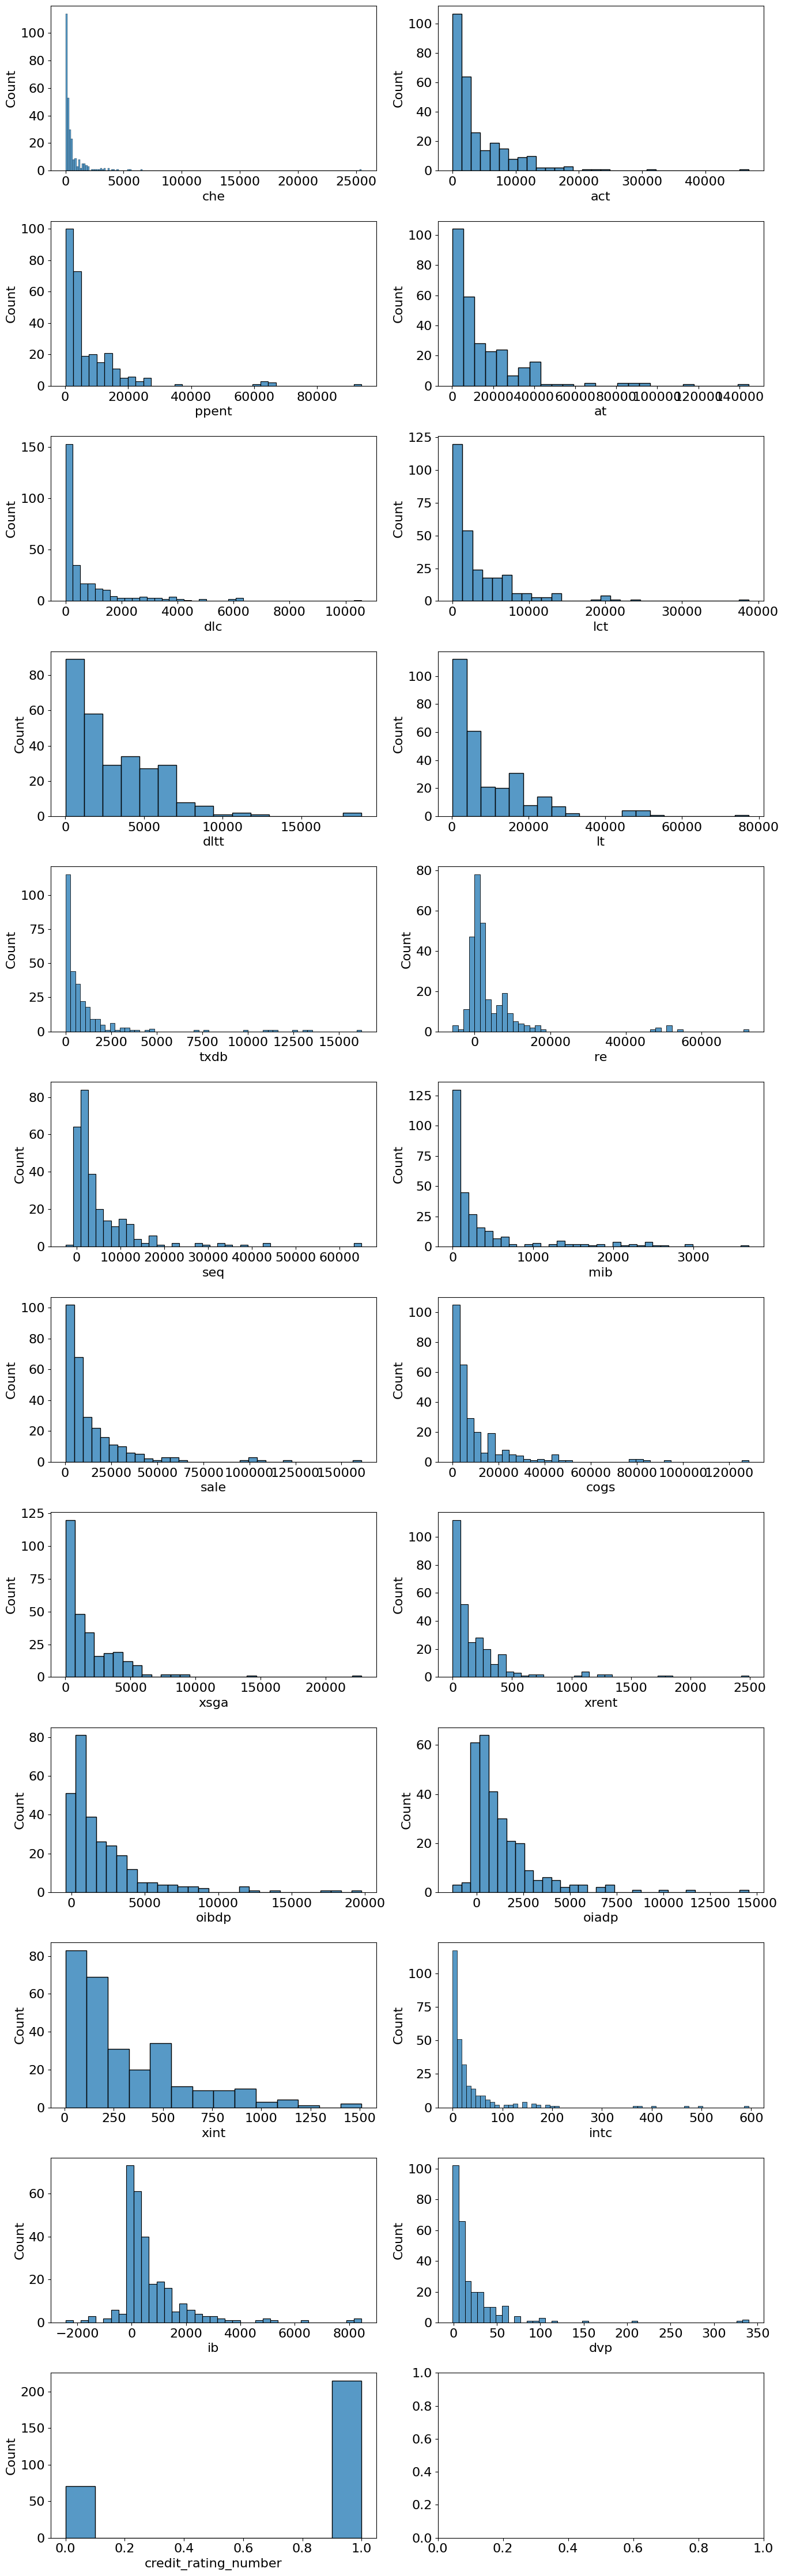

In [26]:


fig,ax=plt.subplots(12,2,figsize=(14,45))
ax=np.ravel(ax)
for i,f in enumerate(float_list):
    if f=='table':
        sns.histplot(df_train[f],discrete=True,ax=ax[i])
    else:
        sns.histplot(df_train[f],discrete=False,ax=ax[i])


plt.tight_layout();

The extremely long right tails (i.e., right-skew) is going to make things difficult to see. Let's start working with logarithms.

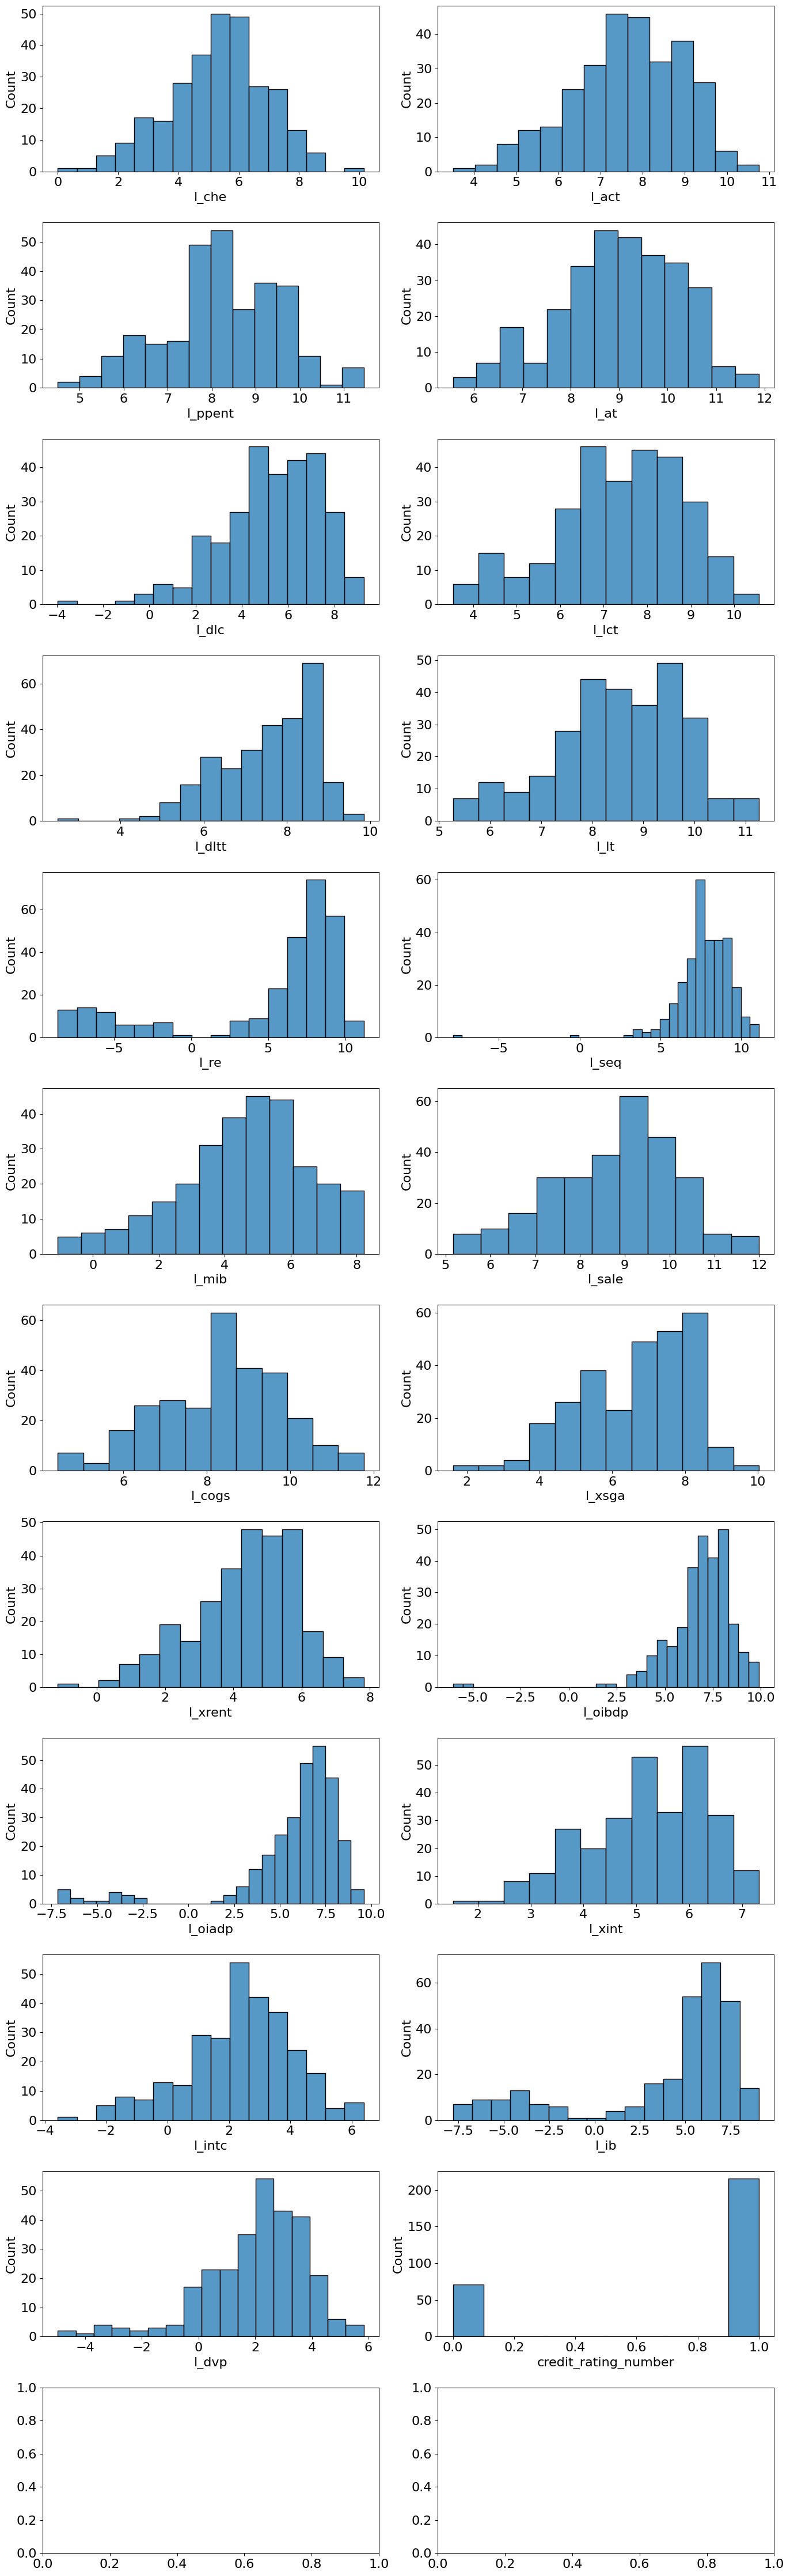

In [27]:
fig,ax=plt.subplots(12,2,figsize=(14,45))
ax=np.ravel(ax)
for i,f in enumerate(lfloat_list):
    if f=='table':
        sns.histplot(df_train[f],discrete=True,ax=ax[i])
    else:
        sns.histplot(df_train[f],discrete=False,ax=ax[i])


plt.tight_layout();

Correlation matrix

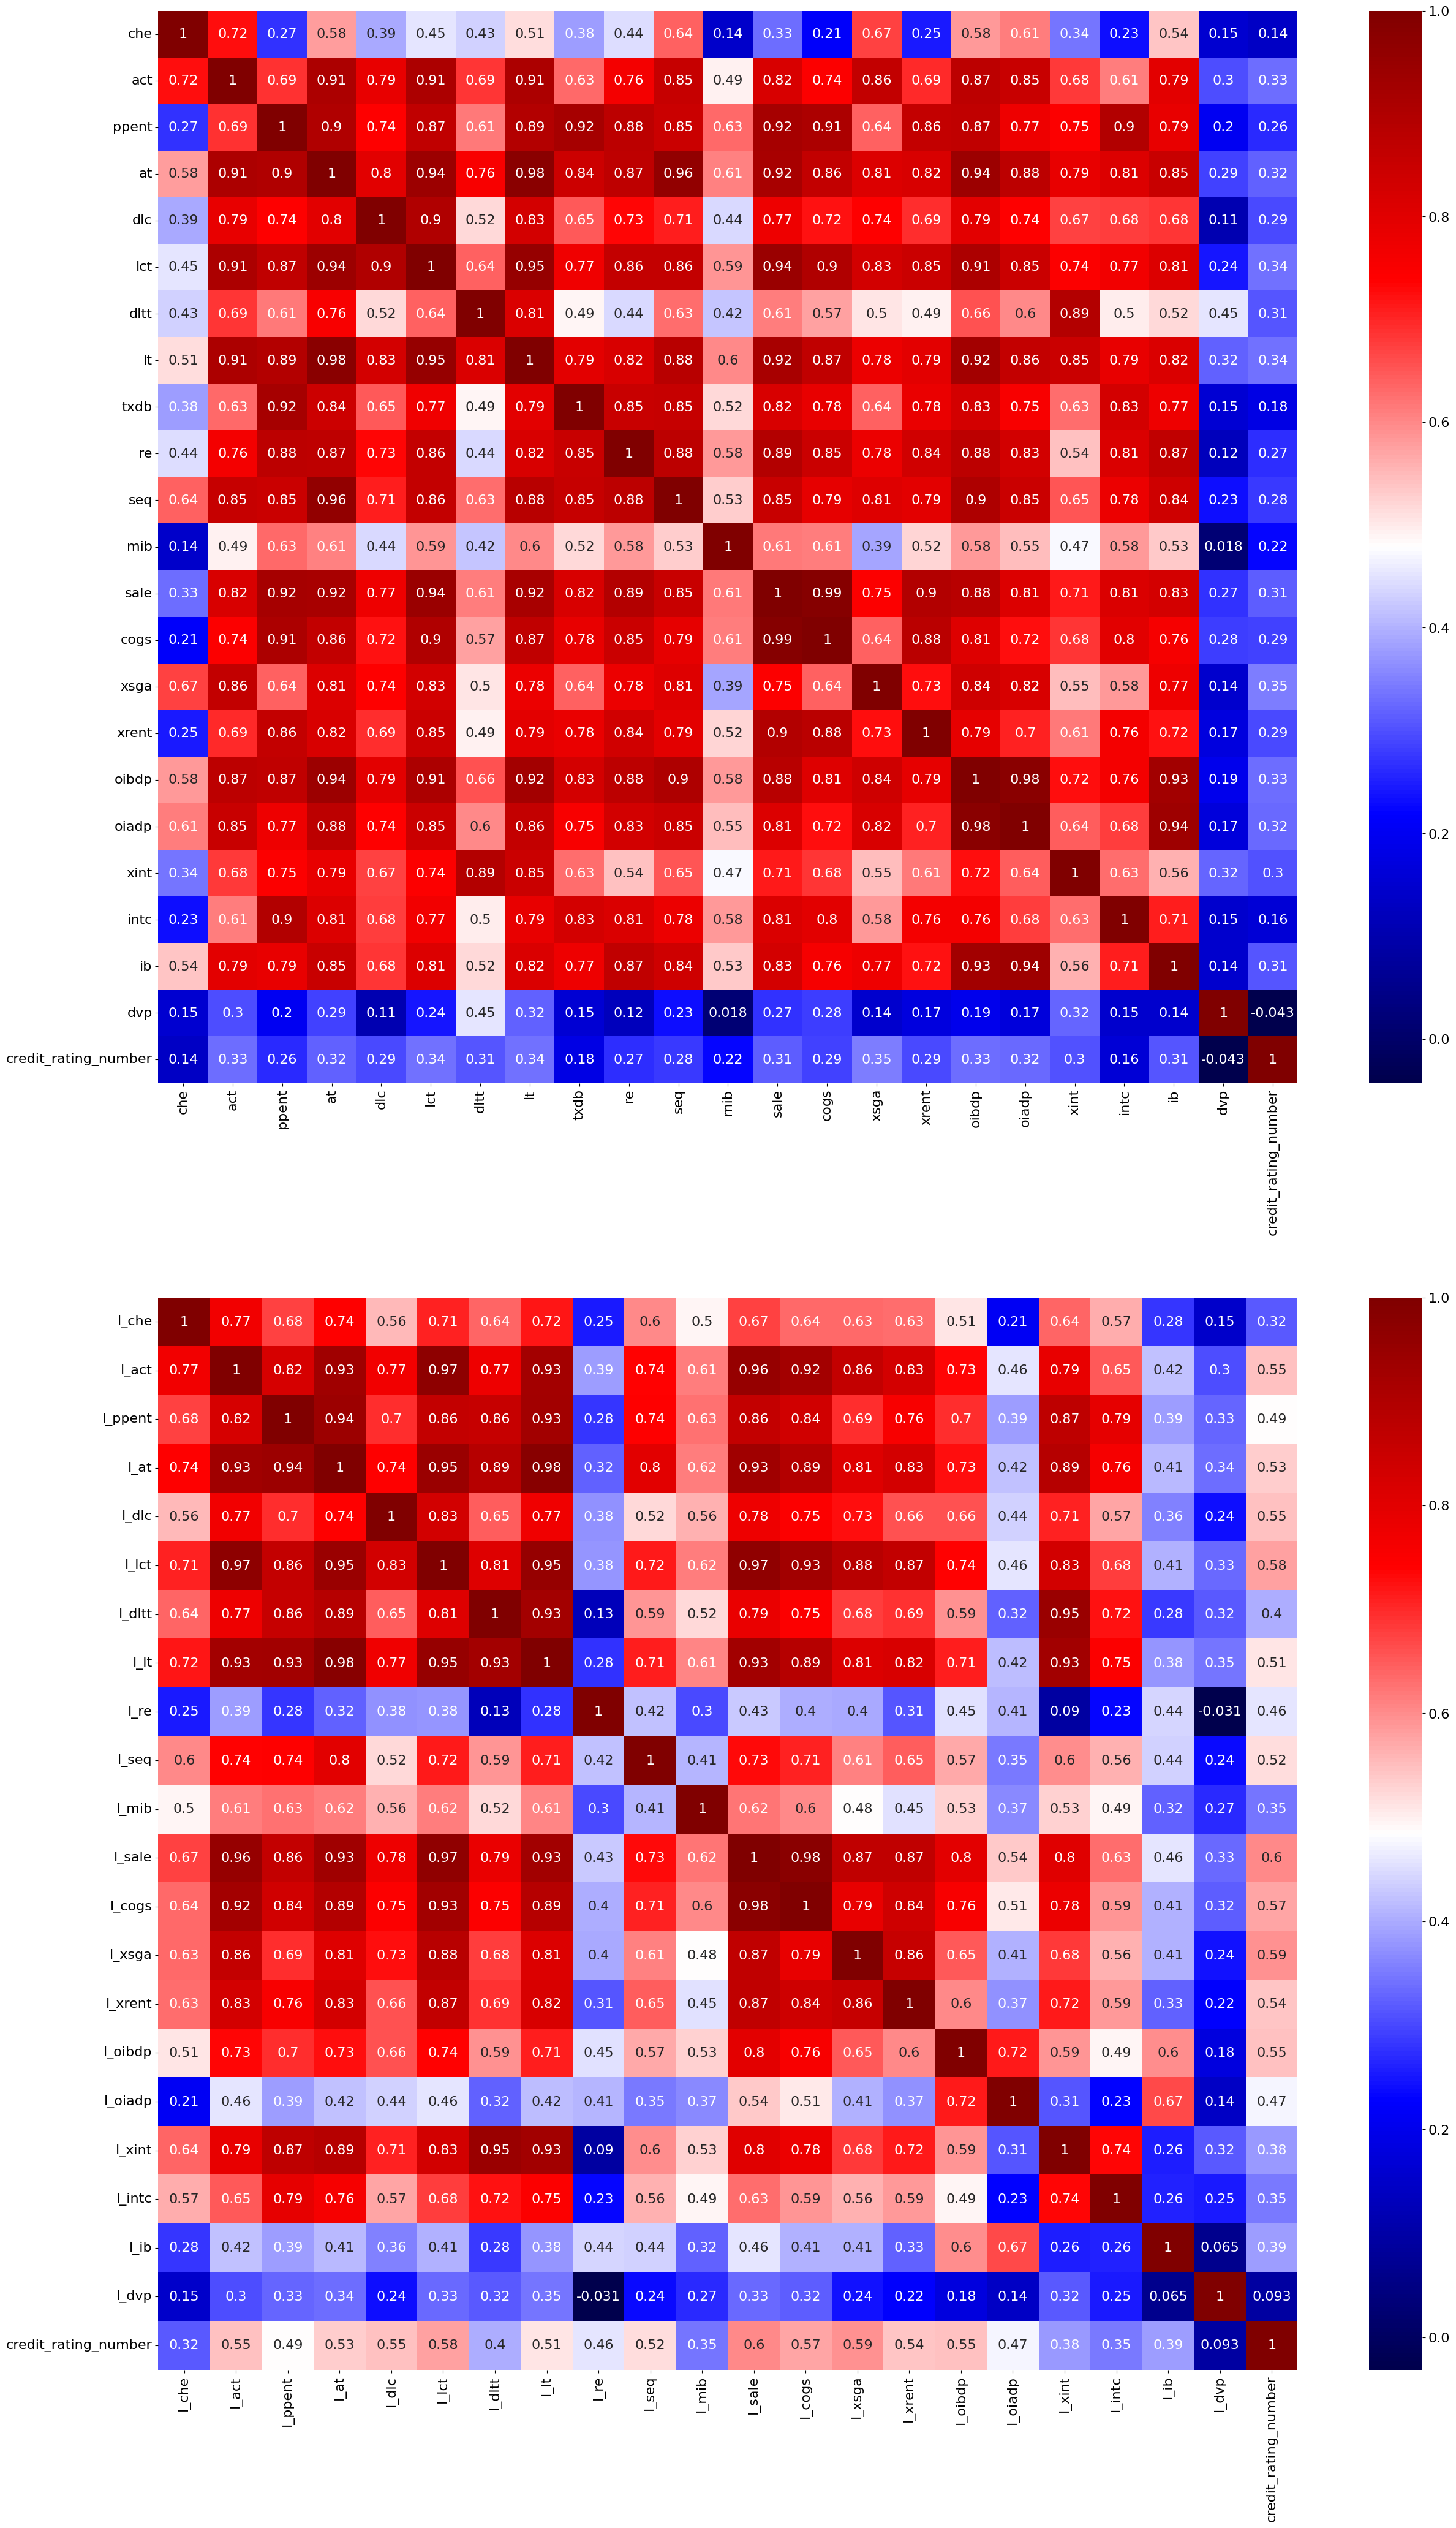

In [28]:
fig,ax=plt.subplots(2,1,figsize=(30,50))
c = df_train[float_list].corr()
sns.heatmap(c,annot=True,cmap='seismic',ax=ax[0])
c = df_train[lfloat_list].corr()
sns.heatmap(c,annot=True,cmap='seismic',ax=ax[1]);

# **Problem 4**

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

vlist = ['l_che', 'l_act', 'l_ppent', 'l_at', 'l_dlc', 'l_lct', 'l_dltt',
       'l_lt', 'l_re', 'l_seq', 'l_mib', 'l_sale', 'l_cogs',
       'l_xsga', 'l_xrent', 'l_oibdp', 'l_oiadp', 'l_xint', 'l_intc', 'l_ib',
        'current_ratio', 'interest_coverage',
       'return_on_equity', 'asset_turnover', 'gross_profit_margin',
       'operating_margin', 'net_profit_margin', 'return_on_asset',
       'debt_ratio','credit_rating_number']

df_end = df_new[vlist]

train_df, test_df = train_test_split(df_end, test_size=0.25, random_state=42)

y_tr = train_df['credit_rating_number']
X_tr = train_df.iloc[:,0:-1]

y_test = test_df['credit_rating_number']
X_test = test_df.iloc[:,0:-1]

scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_test = scaler.transform(X_test)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_tr, y_tr)


# 打印模型的所有参数
params = model.get_params()
for param_name, param_value in params.items():
    print(param_name, ":", param_value)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算模型准确率
accuracy = accuracy_score(y_test, y_pred)
print("准确率：", accuracy)

C : 1.0
class_weight : None
dual : False
fit_intercept : True
intercept_scaling : 1
l1_ratio : None
max_iter : 1000
multi_class : multinomial
n_jobs : None
penalty : l2
random_state : None
solver : lbfgs
tol : 0.0001
verbose : 0
warm_start : False
准确率： 0.8854166666666666


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

vlist = ['che', 'act',
       'ppent', 'at', 'dlc', 'lct', 'dltt', 'lt', 'txdb', 're', 'seq', 'mib',
       'sale', 'cogs', 'xsga', 'xrent', 'oibdp', 'oiadp', 'xint', 'intc', 'ib',
       'dvp','current_ratio', 'interest_coverage',
       'return_on_equity', 'asset_turnover', 'gross_profit_margin',
       'operating_margin', 'net_profit_margin', 'return_on_asset',
       'debt_ratio',  'credit_rating_number']

df_end = df_new[vlist]

train_df, test_df = train_test_split(df_end, test_size=0.25, random_state=42)

y_tr = train_df['credit_rating_number']
X_tr = train_df.iloc[:,0:-1]

y_test = test_df['credit_rating_number']
X_test = test_df.iloc[:,0:-1]

scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_tr, y_tr)


# 打印模型的所有参数
params = model.get_params()
for param_name, param_value in params.items():
    print(param_name, ":", param_value)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算模型准确率
accuracy = accuracy_score(y_test, y_pred)
print("准确率：", accuracy)

C : 1.0
class_weight : None
dual : False
fit_intercept : True
intercept_scaling : 1
l1_ratio : None
max_iter : 1000
multi_class : multinomial
n_jobs : None
penalty : l2
random_state : None
solver : lbfgs
tol : 0.0001
verbose : 0
warm_start : False
准确率： 0.8541666666666666


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

vlist = ['current_ratio', 'interest_coverage',
       'return_on_equity', 'asset_turnover', 'gross_profit_margin',
       'operating_margin', 'net_profit_margin', 'return_on_asset',
       'debt_ratio', 'credit_rating_number']

df_end = df_new[vlist]

train_df, test_df = train_test_split(df_end, test_size=0.25, random_state=42)

y_tr = train_df['credit_rating_number']
X_tr = train_df.iloc[:,0:-1]

y_test = test_df['credit_rating_number']
X_test = test_df.iloc[:,0:-1]

scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_tr, y_tr)


# 打印模型的所有参数
params = model.get_params()
for param_name, param_value in params.items():
    print(param_name, ":", param_value)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算模型准确率
accuracy = accuracy_score(y_test, y_pred)
print("准确率：", accuracy)

C : 1.0
class_weight : None
dual : False
fit_intercept : True
intercept_scaling : 1
l1_ratio : None
max_iter : 1000
multi_class : multinomial
n_jobs : None
penalty : l2
random_state : None
solver : lbfgs
tol : 0.0001
verbose : 0
warm_start : False
准确率： 0.8333333333333334


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

vlist = ['l_che', 'l_act', 'l_ppent', 'l_at', 'l_dlc', 'l_lct', 'l_dltt',
       'l_lt',  'l_re', 'l_seq', 'l_mib', 'l_sale', 'l_cogs',
       'l_xsga', 'l_xrent', 'l_oibdp', 'l_oiadp', 'l_xint', 'l_intc', 'l_ib',
       'credit_rating_number']

df_end = df_new[vlist]

train_df, test_df = train_test_split(df_end, test_size=0.25, random_state=42)

y_tr = train_df['credit_rating_number']
X_tr = train_df.iloc[:,0:-1]

y_test = test_df['credit_rating_number']
X_test = test_df.iloc[:,0:-1]

scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_tr, y_tr)


# 打印模型的所有参数
params = model.get_params()
for param_name, param_value in params.items():
    print(param_name, ":", param_value)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算模型准确率
accuracy = accuracy_score(y_test, y_pred)
print("准确率：", accuracy)

C : 1.0
class_weight : None
dual : False
fit_intercept : True
intercept_scaling : 1
l1_ratio : None
max_iter : 1000
multi_class : multinomial
n_jobs : None
penalty : l2
random_state : None
solver : lbfgs
tol : 0.0001
verbose : 0
warm_start : False
准确率： 0.8854166666666666


### **SGD Model**

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

vlist = ['l_che', 'l_act', 'l_ppent', 'l_at', 'l_dlc', 'l_lct', 'l_dltt', 'l_lt', 'l_txdb', 'l_re', 'l_seq', 'l_mib', 'l_sale', 'l_cogs', 'l_xsga', 'l_xrent', 'l_oibdp', 'l_oiadp', 'l_xint', 'l_intc', 'l_ib', 'l_dvp', 'credit_rating_number']
df_end = df_new[vlist]

train_df, test_df = train_test_split(df_end, test_size=0.25, random_state=42)

y_tr = train_df['credit_rating_number']
X_tr = train_df.iloc[:,0:-1]
y_test = test_df['credit_rating_number']
X_test = test_df.iloc[:,0:-1]

scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_test = scaler.transform(X_test)

model = SGDClassifier(loss='log', penalty='l2', alpha=0.0001, random_state=42, max_iter=1000, tol=1e-3)
model.fit(X_tr, y_tr)

# 打印模型的所有参数
params = model.get_params()
for param_name, param_value in params.items():
    print(param_name, ":", param_value)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算模型准确率
accuracy = accuracy_score(y_test, y_pred)
print("准确率:", accuracy)

alpha : 0.0001
average : False
class_weight : None
early_stopping : False
epsilon : 0.1
eta0 : 0.0
fit_intercept : True
l1_ratio : 0.15
learning_rate : optimal
loss : log
max_iter : 1000
n_iter_no_change : 5
n_jobs : None
penalty : l2
power_t : 0.5
random_state : 42
shuffle : True
tol : 0.001
validation_fraction : 0.1
verbose : 0
warm_start : False
准确率: 0.875


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
